In [60]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import os
import requests

In [61]:
# Weather API Function
def get_real_time_weather(api_key, city='Malabe'):
    """
    Fetch real-time weather data from OpenWeatherMap API
    
    Args:
        api_key (str): OpenWeatherMap API key
        city (str): City name for weather data
    
    Returns:
        dict: Temperature and Humidity data
    """
    base_url = "http://api.openweathermap.org/data/2.5/weather"
    params = {
        'q': city,
        'appid': api_key,
        'units': 'metric'  # Use Celsius
    }
    
    try:
        response = requests.get(base_url, params=params)
        response.raise_for_status()
        data = response.json()
        
        return {
            'temperature': data['main']['temp'],
            'humidity': data['main']['humidity']
        }
    except requests.RequestException as e:
        print(f"Error fetching weather data: {e}")
        # Fallback to default values if API call fails
        return {
            'temperature': 25,  # Default temperature
            'humidity': 50      # Default humidity
        }

In [62]:
# Load the dataset
df = pd.read_csv('copra_drying_dataset_with_oil_yield_3.csv')

In [63]:
df.head(2)

,Maturity Stage (Days),Initial Moisture Level (%),Temperature (°C),Humidity (%),Drying Time (hrs),Estimated Oil Yield (kg)
0,83,26.544751,27.104487,68.849233,14.86,5.44
1,127,52.819448,31.227636,45.023493,19.84,4.56


In [64]:
X = df[['Initial Moisture Level (%)', 'Temperature (°C)', 'Humidity (%)']]
y = df['Drying Time (hrs)']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# Define accuracy calculation function
def calculate_accuracy(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    accuracy = 100 * (1 - rmse / np.mean(y_true))
    return max(0, accuracy)

In [67]:
# Train Support Vector Regressor
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
svr_y_pred = svr_model.predict(X_test)
svr_mae = mean_absolute_error(y_test, svr_y_pred)
svr_r2 = r2_score(y_test, svr_y_pred)
svr_accuracy = calculate_accuracy(y_test, svr_y_pred)

In [68]:
# Train Linear Regressor
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)
lr_mae = mean_absolute_error(y_test, lr_y_pred)
lr_r2 = r2_score(y_test, lr_y_pred)
lr_accuracy = calculate_accuracy(y_test, lr_y_pred)

In [69]:
# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
rf_accuracy = calculate_accuracy(y_test, rf_y_pred)

In [70]:
# Train Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
gb_mae = mean_absolute_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)
gb_accuracy = calculate_accuracy(y_test, gb_y_pred)

In [71]:
# Determine the best model based on weighted scores
alpha = 0.7  # Weight for R²
beta = 0.3   # Weight for MAE
svr_score = alpha * svr_r2 - beta * svr_mae
lr_score = alpha * lr_r2 - beta * lr_mae
rf_score = alpha * rf_r2 - beta * rf_mae
gb_score = alpha * gb_r2 - beta * gb_mae

# Compare all models based on the weighted scores
if gb_score > rf_score and gb_score > svr_score and gb_score > lr_score:
    best_model = gb_model
    best_model_name = "Gradient Boosting"
    reason = f"Weighted Score: {gb_score:.2f} (Higher than SVR, Linear Regression and Random Forest)"
elif rf_score > svr_score and rf_score > lr_score:
    best_model = rf_model
    best_model_name = "Random Forest"
    reason = f"Weighted Score: {rf_score:.2f} (Higher than SVR and Linear Regression)"
elif svr_score > lr_score:
    best_model = svr_model
    best_model_name = "Support Vector Regression"
    reason = f"Weighted Score: {svr_score:.2f} (Higher than Linear Regression)"
else:
    best_model = lr_model
    best_model_name = "Linear Regression"
    reason = f"Weighted Score: {lr_score:.2f}"   

In [72]:
# Print model performance for all models
print(f"Support Vector Regression MAE: {svr_mae}")
print(f"Support Vector Regression R²: {svr_r2}")
print(f"Support Vector Regression Accuracy: {svr_accuracy:.2f}%")
print(f"")

print(f"Linear Regression MAE: {lr_mae}")
print(f"Linear Regression R²: {lr_r2}")
print(f"Linear Regression Accuracy: {lr_accuracy:.2f}%")
print(f"")

print(f"Random Forest MAE: {rf_mae}")
print(f"Random Forest R²: {rf_r2}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}%")
print(f"")

print(f"Gradient Boosting MAE: {gb_mae}")
print(f"Gradient Boosting R²: {gb_r2}")
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}%")
print(f"")

print(f"Best Model: {best_model_name}")
#print(f"Reason: {reason}")

Support Vector Regression MAE: 1.0706839855033619
Support Vector Regression R²: 0.9630505354443863
Support Vector Regression Accuracy: 92.16%

Linear Regression MAE: 1.2999518154417542
Linear Regression R²: 0.9447301554914335
Linear Regression Accuracy: 90.42%

Random Forest MAE: 1.0884001754385968
Random Forest R²: 0.9607221244704074
Random Forest Accuracy: 91.92%

Gradient Boosting MAE: 1.0627850303473962
Gradient Boosting R²: 0.9640261148414051
Gradient Boosting Accuracy: 92.27%

Best Model: Gradient Boosting


In [73]:
# Save the best model
joblib.dump(best_model, 'best_drying_time_model.pkl')


['best_drying_time_model.pkl']

In [74]:
# Load the best model for prediction
loaded_model = joblib.load('best_drying_time_model.pkl')

# Example new input data (as a DataFrame)
new_data = pd.DataFrame({
    'Initial Moisture Level (%)': [50],
    'Temperature (°C)': [25],
    'Humidity (%)': [50]
})

# Option 2: Real-time Weather API Input
# Replace 'YOUR_API_KEY' with your actual OpenWeatherMap API key
API_KEY = '5dd16e6569f3cdae6509d32002b9dc67'  # Get this from OpenWeatherMap
weather_data = get_real_time_weather(API_KEY)

api_new_data = pd.DataFrame({
    'Initial Moisture Level (%)': [50],
    'Temperature (°C)': [weather_data['temperature']],
    'Humidity (%)': [weather_data['humidity']]
})

# Predict the drying time for new data
predicted_drying_time = loaded_model.predict(new_data)
api_predicted_drying_time = loaded_model.predict(api_new_data)

#print("Predicted Drying Time (Manual Input) (hrs):", round(predicted_drying_time[0], 2))
print("Predicted Drying Time (API Input) (hrs):", round(api_predicted_drying_time[0], 2))


Predicted Drying Time (API Input) (hrs): 25.71


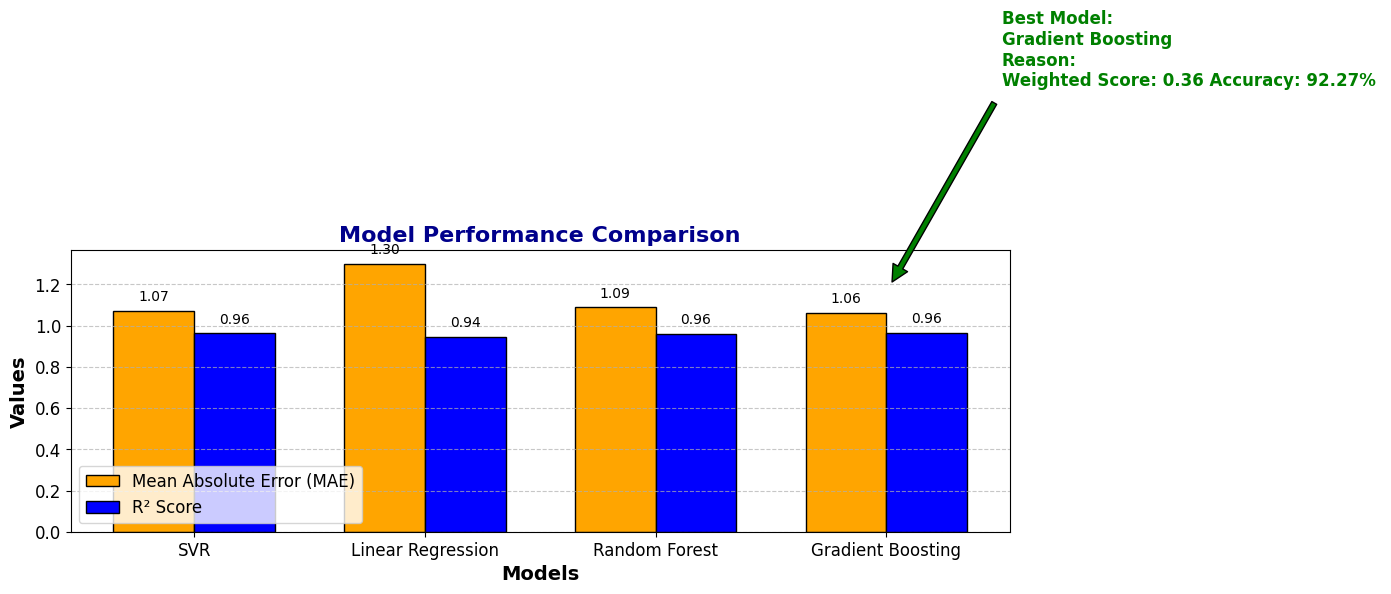

In [75]:
# Visualization of model performance
import matplotlib.pyplot as plt

# Determine the best model
if gb_score > rf_score and gb_score > svr_score and gb_score > lr_score:
    best_model = "Gradient Boosting"
    reason = (
        f"Weighted Score: {gb_score:.2f} "
        f"Accuracy: {gb_accuracy:.2f}% "
    )
elif rf_score > svr_score and rf_score > lr_score:
    best_model = "Random Forest"
    reason = (
        f"Weighted Score: {rf_score:.2f} (Higher than SVR and Linear Regression),\n "
        f"Accuracy: {rf_accuracy:.2f}%"
    )
elif svr_score > lr_score:
    best_model = "Support Vector Regression"
    reason = (
        f"Weighted Score: {svr_score:.2f}\n (Higher than Linear Regression), \n"
        f"Accuracy: {svr_accuracy:.2f}%"
    )
else:
    best_model = "Linear Regression"
    reason = (
        f"Weighted Score: {lr_score:.2f}\n"
        f"Accuracy: {lr_accuracy:.2f}%"
    )

# Data for the models
labels = ['SVR', 'Linear Regression', 'Random Forest', 'Gradient Boosting']
mae_values = [svr_mae, lr_mae, rf_mae, gb_mae]
r2_values = [svr_r2, lr_r2, rf_r2, gb_r2]

x = np.arange(len(labels))  # Label locations
width = 0.35  # Bar width

# Plot the graph
fig, ax = plt.subplots(figsize=(14, 8))
bar1 = ax.bar(x - width/2, mae_values, width, label='Mean Absolute Error (MAE)', color='orange', edgecolor='black')
bar2 = ax.bar(x + width/2, r2_values, width, label='R² Score', color='blue', edgecolor='black')

# Add labels, title, and grid
ax.set_xlabel('Models', fontsize=14, fontweight='bold')
ax.set_ylabel('Values', fontsize=14, fontweight='bold')
ax.set_title('Model Performance Comparison', fontsize=16, fontweight='bold', color='darkblue')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.legend(fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with values
for bar in bar1:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5), textcoords="offset points", ha='center', va='bottom', fontsize=10, color='black')

for bar in bar2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5), textcoords="offset points", ha='center', va='bottom', fontsize=10, color='black')

# Highlight the best model with an arrow and text
best_model_index = labels.index(best_model)
best_model_x = x[best_model_index]  # X-coordinate for the best model
best_model_y = max(mae_values[best_model_index], r2_values[best_model_index]) + 0.1  # Y-coordinate above the highest bar

ax.annotate(f"Best Model:\n{best_model}\nReason:\n{reason}", 
            xy=(best_model_x, best_model_y),
            xytext=(best_model_x + 0.5, best_model_y + 1),
            fontsize=12, color='green', fontweight='bold',
            arrowprops=dict(facecolor='green', shrink=0.05, edgecolor='black'))

# Add additional styling
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

For Oil yeld

In [76]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score
import joblib

In [77]:
#df.head(2)

In [78]:
X = df[['Initial Moisture Level (%)', 'Temperature (°C)', 'Humidity (%)','Drying Time (hrs)']]
y = df['Estimated Oil Yield (kg)']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
# Initialize models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
svr_model = SVR(kernel='rbf')

In [81]:
# Train the Random Forest model
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

In [82]:
# Train the Gradient Boosting model
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)

In [83]:
# Train the Support Vector Regression model
svr_model.fit(X_train, y_train)
svr_y_pred = svr_model.predict(X_test)

In [84]:
# Function to calculate accuracy (RMSE and Accuracy)
def calculate_accuracy(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    accuracy = 100 * (1 - rmse / np.mean(y_true))
    return max(0, accuracy)

In [85]:
# Evaluate the models
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
rf_accuracy = calculate_accuracy(y_test, rf_y_pred)

gb_mae = mean_absolute_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)
gb_accuracy = calculate_accuracy(y_test, gb_y_pred)

svr_mae = mean_absolute_error(y_test, svr_y_pred)
svr_r2 = r2_score(y_test, svr_y_pred)
svr_accuracy = calculate_accuracy(y_test, svr_y_pred)

In [86]:
# Select the best model based on the R² score
if gb_r2 > rf_r2 and gb_r2 > svr_r2:
    best_model = gb_model
    best_model_name = "Gradient Boosting Regressor"
    best_mae = gb_mae
    best_r2 = gb_r2
    best_accuracy = gb_accuracy
elif rf_r2 > gb_r2 and rf_r2 > svr_r2:
    best_model = rf_model
    best_model_name = "Random Forest Regressor"
    best_mae = rf_mae
    best_r2 = rf_r2
    best_accuracy = rf_accuracy
else:
    best_model = svr_model
    best_model_name = "Support Vector Regression"
    best_mae = svr_mae
    best_r2 = svr_r2
    best_accuracy = svr_accuracy

In [87]:
# Print the model evaluation results with accuracy
print("Random Forest \nMAE:", rf_mae, "\nR² Score:", rf_r2, "\nAccuracy:", rf_accuracy, "%")
print("\nGradient Boosting \nMAE:", gb_mae, "\nR² Score:", gb_r2, "\nAccuracy:", gb_accuracy, "%")
print("\nSupport Vector Regression \nMAE:", svr_mae, "\nR² Score:", svr_r2, "\nAccuracy:", svr_accuracy, "%")


# Print the best model
print(f"\nBest Model: {best_model_name}")
print(f"Reason: Higher R² Score ({best_r2:.2f}) with MAE of {best_mae:.2f} and Accuracy of {best_accuracy:.2f}%")


Random Forest 
MAE: 0.2149256140350878 
R² Score: 0.1850020990084411 
Accuracy: 94.77694789170322 %

Gradient Boosting 
MAE: 0.22898734903080034 
R² Score: 0.12691242276303982 
Accuracy: 94.59401273893572 %

Support Vector Regression 
MAE: 0.19049263209374537 
R² Score: 0.3475570028531828 
Accuracy: 95.3267673683246 %

Best Model: Support Vector Regression
Reason: Higher R² Score (0.35) with MAE of 0.19 and Accuracy of 95.33%


In [88]:
import joblib

# Save the best model
joblib.dump(best_model, 'best_oil_yield_predictor.pkl')


['best_oil_yield_predictor.pkl']

In [89]:
# Load the best model
loaded_model = joblib.load('best_oil_yield_predictor.pkl')

# Example new input data (as a DataFrame)
new_data = pd.DataFrame({
    'Initial Moisture Level (%)': [40],
    'Temperature (°C)': [30],
    'Humidity (%)': [50],
    'Drying Time (hrs)':[20]
})

# Option 2: Real-time Weather API Input
# Replace 'YOUR_API_KEY' with your actual OpenWeatherMap API key
API_KEY = '5dd16e6569f3cdae6509d32002b9dc67'  # Get this from OpenWeatherMap
weather_data = get_real_time_weather(API_KEY)

api_new_data = pd.DataFrame({
    'Initial Moisture Level (%)': [50],
    'Temperature (°C)': [weather_data['temperature']],
    'Humidity (%)': [weather_data['humidity']],
    'Drying Time (hrs)':[23.61]
})

# Predict the oil yield for new data using the best model
predicted_oil_yield = loaded_model.predict(new_data)
api_predicted_oil_yield = loaded_model.predict(api_new_data)
#print("Predicted Oil Yield (kg):", predicted_oil_yield[0])
print("Predicted Oil Yield (API Input) (kg):", api_predicted_oil_yield[0])


Predicted Oil Yield (API Input) (kg): 4.623766425659092
